In [2]:
import pandas as pd
import mysql.connector

In [8]:
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root', 
    password = 'Kaynat@73'
)

In [11]:
df = pd.read_sql_query("""
SELECT * FROM (
SELECT 
CONCAT("match-",CAST( ROW_NUMBER() OVER(ORDER BY ID) AS CHAR )) AS 'match_no',
SUM(batsman_run) AS 'run_scored',
SUM(SUM(batsman_run)) OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS 'career_runs',
AVG(SUM(batsman_run)) OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS 'career_avg',
AVG(SUM(batsman_run)) OVER (ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS 'rolling_avg'
FROM kaynatx.ipl
WHERE batter = 'V kohli'
GROUP BY ID
) t
""", conn)

C:\Users\kayna\AppData\Local\Temp\ipykernel_9044\824058086.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""


In [12]:
df

,match_no,run_scored,career_runs,career_avg,rolling_avg
0,match-1,1.0,1.0,1.0000,1.0000
1,match-2,23.0,24.0,12.0000,12.0000
2,match-3,13.0,37.0,12.3333,12.3333
3,match-4,12.0,49.0,12.2500,12.2500
4,match-5,1.0,50.0,10.0000,10.0000
...,...,...,...,...,...
210,match-211,0.0,6509.0,30.8483,16.3000
211,match-212,20.0,6529.0,30.7972,17.8000
212,match-213,73.0,6602.0,30.9953,20.3000
213,match-214,25.0,6627.0,30.9673,22.7000


In [13]:
df.head()

,match_no,run_scored,career_runs,career_avg,rolling_avg
0,match-1,1.0,1.0,1.0000,1.0000
1,match-2,23.0,24.0,12.0000,12.0000
2,match-3,13.0,37.0,12.3333,12.3333
3,match-4,12.0,49.0,12.2500,12.2500
4,match-5,1.0,50.0,10.0000,10.0000


In [10]:
import matplotlib.pyplot as plt

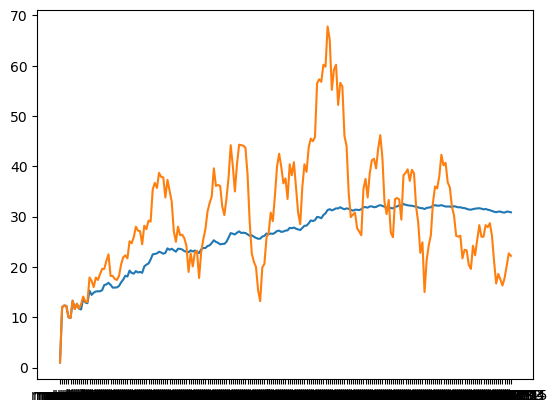

In [15]:
plt.plot(df['match_no'],df['career_avg'])
plt.plot(df['match_no'],df['rolling_avg'])